In [1]:
# Import dependencies
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
# import seaborn as sns

In [2]:
# pd.show_versions(as_json=False)

In [4]:
# Read in csv file
items_df = pd.read_csv('data/googleplaystore.csv')
items_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
#Summary statistics of Ratings and Reviews
items_df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [6]:
# Read in csv file
reviews_df = pd.read_csv('data/googleplaystore_user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
# Display total number of apps from the google play store in this data set
total_apps = items_df['App'].nunique()
total_apps
print('There are', total_apps, 'apps in this data set.')

There are 9659 apps in this data set.


In [6]:
# Display total number of categories  
total_cate = items_df['Category'].nunique()
total_cate
print('There are', total_cate, 'different categories avaliable in the play store.')

There are 33 different categories avaliable in the play store.


In [7]:
# Display total number of genres 
total_genres = items_df['Genres'].nunique()
total_genres
print('There are', total_genres, 'different genres in this data set.')

There are 119 different genres in this data set.


In [8]:
# Find how many apps belong to each genre
genres = items_df.groupby('Genres')['Genres'].count()
genres

Genres
Action                                   365
Action;Action & Adventure                 17
Adventure                                 75
Adventure;Action & Adventure              13
Adventure;Brain Games                      1
Adventure;Education                        2
Arcade                                   220
Arcade;Action & Adventure                 16
Arcade;Pretend Play                        1
Art & Design                              58
Art & Design;Action & Adventure            2
Art & Design;Creativity                    7
Art & Design;Pretend Play                  2
Auto & Vehicles                           85
Beauty                                    53
Board                                     44
Board;Action & Adventure                   3
Board;Brain Games                         15
Board;Pretend Play                         1
Books & Reference                        231
Books & Reference;Creativity               1
Books & Reference;Education                2
Bus

In [9]:
# Find the top ten most popular genres
top_genres = genres.nlargest(10)
top_genres

Genres
Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

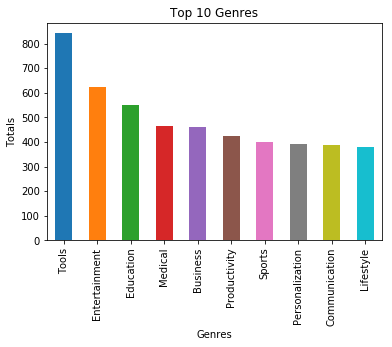

In [10]:
# Graph top ten genres
top_genre_chart = top_genres.plot(kind='bar')
top_genre_chart.set_xlabel('Genres')
top_genre_chart.set_ylabel('Totals')
plt.title('Top 10 Genres')
plt.show()

In [44]:
# Find how many apps belong to each category
category = (items_df.groupby('Category')['Category'].count())
category

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Category, dtype: int64

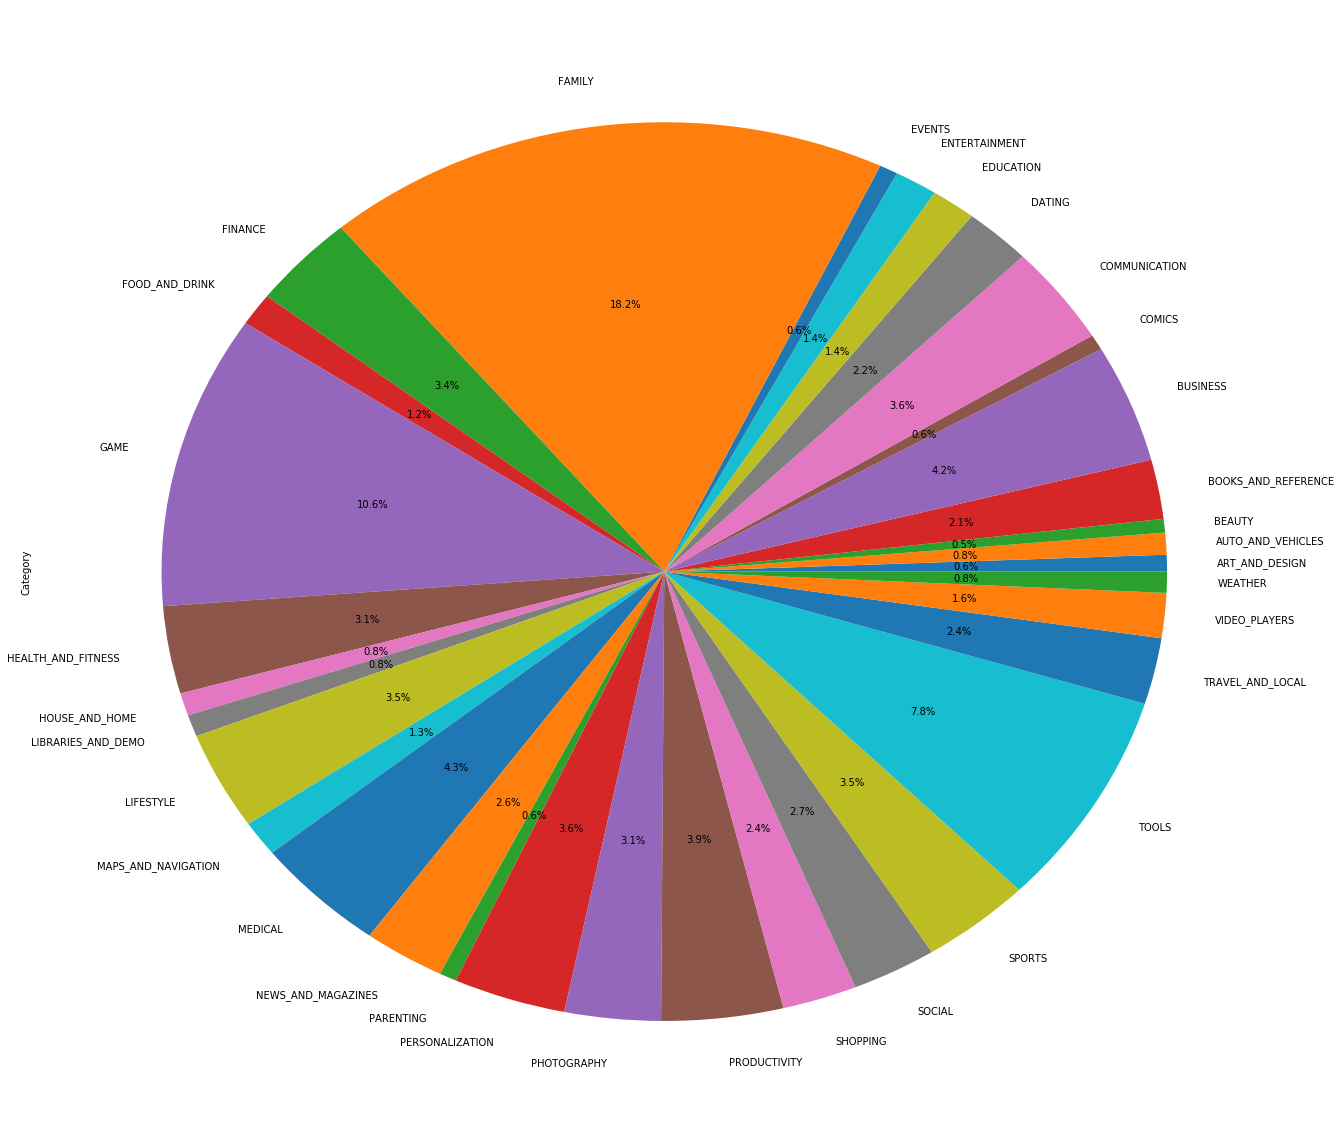

In [81]:
 
# plt.pie(category, figsize=(10, 5), autopct="%1.1f%%", shadow=True)
# plt.figure(figsize=(10,8))
# plt.legend
# plt.show()
cate_pie = category.plot(kind='pie', figsize=(18,16), autopct="%1.1f%%")
plt.tight_layout()
plt.savefig('cate_pie.png')

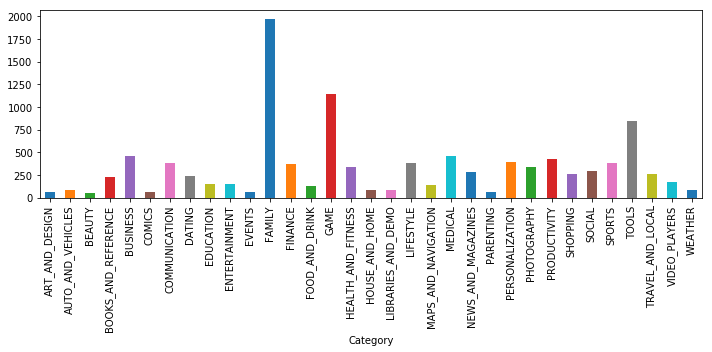

In [80]:
# plt.bar(category)
# plt.show()
# position = [0, 2, 4, 6, 8]
cate_bar = category.plot(kind='bar', figsize=(10, 5))
plt.tight_layout()
plt.savefig('cate_bar.png')

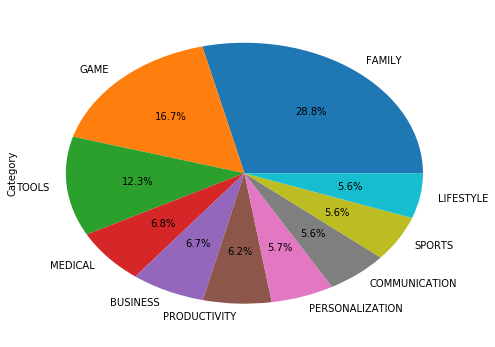

In [59]:
top_category = category.nlargest(10)
top_cate_pie = top_category.plot(kind='pie', figsize=(8, 6), autopct="%1.1f%%")
# plt.savefig('')

In [16]:
# View summary statistics for Ratings
items_df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [17]:
avg_rating = items_df['Rating'].mean().round(2)
print("The apps have an average rating of", avg_rating, "stars.")

The apps have an average rating of 4.19 stars.


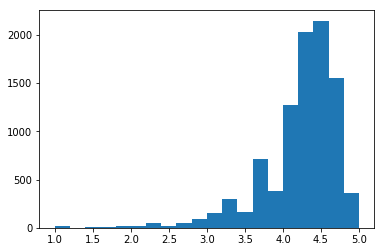

In [25]:
# new_df = items_df.loc[:6]
# new_df
x = items_df['Rating']
# sns.distplot(x, kde=False)
plt.hist(x.dropna(), bins=20)
plt.show()

In [26]:
cate_rating = items_df.groupby('Category')['Rating'].mean()
cate_rating

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [27]:
top_cat_rate = cate_rating.nlargest(10)
top_cat_rate

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64

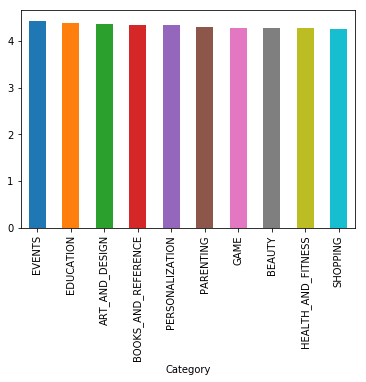

In [28]:
avg_cat_bar = top_cat_rate.plot(kind='bar')

In [29]:
genre_rating = items_df.groupby('Genres')['Rating'].mean()
genre_rating

Genres
Action                                   4.285475
Action;Action & Adventure                4.311765
Adventure                                4.180822
Adventure;Action & Adventure             4.423077
Adventure;Brain Games                    4.600000
Adventure;Education                      4.100000
Arcade                                   4.304348
Arcade;Action & Adventure                4.346667
Arcade;Pretend Play                      4.500000
Art & Design                             4.358929
Art & Design;Action & Adventure               NaN
Art & Design;Creativity                  4.400000
Art & Design;Pretend Play                3.900000
Auto & Vehicles                          4.190411
Beauty                                   4.278571
Board                                    4.292683
Board;Action & Adventure                 4.033333
Board;Brain Games                        4.340000
Board;Pretend Play                       4.800000
Books & Reference                        4.

In [30]:
top_gen_rate = genre_rating.nlargest(10)
top_gen_rate

Genres
Board;Pretend Play             4.800000
Comics;Creativity              4.800000
Health & Fitness;Education     4.700000
Adventure;Brain Games          4.600000
Puzzle;Education               4.600000
Strategy;Action & Adventure    4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Arcade;Pretend Play            4.500000
Racing;Pretend Play            4.500000
Name: Rating, dtype: float64

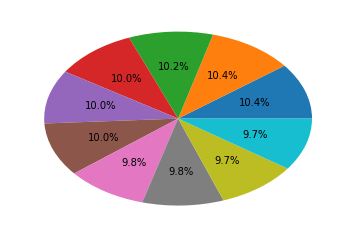

In [31]:
plt.pie(top_gen_rate, autopct="%1.1f%%")

plt.show()

In [32]:
highest_amt_rev = items_df['Reviews'].nlargest(10)
highest_amt_rev

2544    78158306.0
3943    78128208.0
336     69119316.0
381     69119316.0
3904    69109672.0
2604    66577446.0
2545    66577313.0
2611    66577313.0
3909    66509917.0
382     56646578.0
Name: Reviews, dtype: float64

In [33]:
top_row = items_df.loc[2544]
top_row

App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                  7.81583e+07
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated                3-Aug-18
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2544, dtype: object

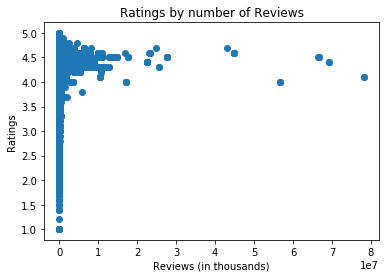

In [34]:
x = items_df['Reviews']
y = items_df['Rating']

plt.scatter(x, y)
plt.xlabel('Reviews (in thousands)')
plt.ylabel('Ratings')
plt.title('Ratings by number of Reviews')
plt.show()

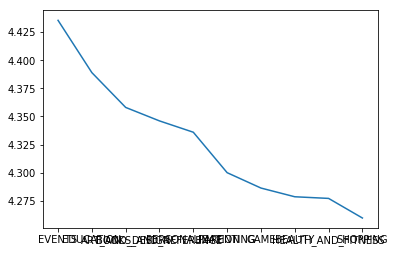

In [35]:
plt.plot(top_cat_rate)

In [36]:
cate_cont = items_df.groupby(['Category', 'Content Rating'])['Rating'].mean()
cate_cont

Category             Content Rating 
ART_AND_DESIGN       Everyone           4.346552
                     Everyone 10+       4.700000
                     Teen               4.466667
AUTO_AND_VEHICLES    Everyone           4.188732
                     Everyone 10+       4.300000
                     Teen               4.200000
BEAUTY               Everyone           4.287179
                     Everyone 10+            NaN
                     Mature 17+         4.500000
                     Teen               4.000000
BOOKS_AND_REFERENCE  Everyone           4.351333
                     Everyone 10+       4.460000
                     Mature 17+         4.166667
                     Teen               4.305000
BUSINESS             Everyone           4.119064
                     Everyone 10+            NaN
                     Mature 17+              NaN
                     Teen               4.300000
COMICS               Adults only 18+    4.200000
                     Everyone   

In [37]:
top_content_category = cate_cont.nlargest(10)
top_content_category

Category          Content Rating
EDUCATION         Teen              4.800000
ART_AND_DESIGN    Everyone 10+      4.700000
PARENTING         Teen              4.700000
WEATHER           Mature 17+        4.700000
HOUSE_AND_HOME    Teen              4.650000
PARENTING         Mature 17+        4.600000
PRODUCTIVITY      Mature 17+        4.600000
TRAVEL_AND_LOCAL  Mature 17+        4.600000
EVENTS            Teen              4.542857
MEDICAL           Teen              4.533333
Name: Rating, dtype: float64

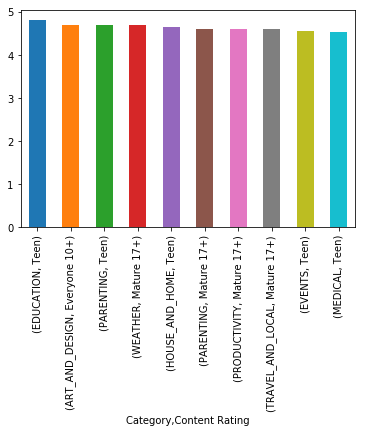

In [38]:
cont_cate_chart = top_content_category.plot(kind='bar')

In [39]:
cate_price_rate = items_df.groupby(['Category', 'Type'])["Rating"].mean()
cate_price_rate

Category             Type
ART_AND_DESIGN       Free    4.338983
                     Paid    4.733333
AUTO_AND_VEHICLES    Free    4.184722
                     Paid    4.600000
BEAUTY               Free    4.278571
BOOKS_AND_REFERENCE  Free    4.349412
                     Paid    4.275000
BUSINESS             Free    4.118493
                     Paid    4.200000
COMICS               Free    4.155172
COMMUNICATION        Free    4.165359
                     Paid    4.063636
DATING               Free    3.978010
                     Paid    3.625000
EDUCATION            Free    4.379470
                     Paid    4.750000
ENTERTAINMENT        Free    4.119728
                     Paid    4.600000
EVENTS               Free    4.435556
                     Paid         NaN
FAMILY               Free    4.181767
                     Paid    4.295062
FINANCE              Free    4.144516
                     Paid    3.830769
FOOD_AND_DRINK       Free    4.163551
                     Pai

In [40]:
type_group = items_df.groupby('Type')['Rating'].mean()
type_group

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

In [41]:
cate_type = items_df.groupby(['Category', 'Type'])
num_rate = cate_type['Rating'].count()
num_rev = cate_type['Reviews'].count()

ct_df = pd.DataFrame({"Number of Ratings": num_rate, "Number of Reviews": num_rev})
ct_df

Number of Ratings  Number of Reviews
Category            Type                                      
ART_AND_DESIGN      Free                 59                 62
                    Paid                  3                  3
AUTO_AND_VEHICLES   Free                 72                 82
                    Paid                  1                  3
BEAUTY              Free                 42                 53
BOOKS_AND_REFERENCE Free                170                203
                    Paid                  8                 28
BUSINESS            Free                292                446
                    Paid                 11                 14
COMICS              Free                 58                 60
COMMUNICATION       Free                306                360
                    Paid                 22                 27
DATING              Free                191                227
                    Paid                  4                  7
EDUCATION           Free                151                152
                    Paid                  4                  4
ENTERTAINMENT       Free                147                147
                    Paid                  2                  2
EVENTS              Free                 45                 63
                    Paid                  0                  1
FAMILY              Free               1585               1780
                    Paid                162                191
FINANCE             Free                310                349
                    Paid                 13                 17
FOOD_AND_DRINK      Free                107                125
                    Paid                  2                  2
GAME                Free               1020               1061
                    Paid                 77                 83
HEALTH_AND_FITNESS  Free                285                325
                    Paid                 12                 16
...                                     ...                ...
LIFESTYLE           Free                296                363
                    Paid                 18                 19
MAPS_AND_NAVIGATION Free                119                132
                    Paid                  5                  5
MEDICAL             Free                262                354
                    Paid                 88                109
NEWS_AND_MAGAZINES  Free                231                281
                    Paid                  2                  2
PARENTING           Free                 48                 58
                    Paid                  2                  2
PERSONALIZATION     Free                247                309
                    Paid                 67                 83
PHOTOGRAPHY         Free                299                313
                    Paid                 18                 22
PRODUCTIVITY        Free                333                396
                    Paid                 18                 28
SHOPPING            Free                236                258
                    Paid                  2                  2
SOCIAL              Free                257                292
                    Paid                  2                  3
SPORTS              Free                297                360
                    Paid                 22                 24
TOOLS               Free                671                765
                    Paid                 63                 78
TRAVEL_AND_LOCAL    Free                218                246
                    Paid                  8                 12
VIDEO_PLAYERS       Free                156                171
                    Paid                  4                  4
WEATHER             Free                 68                 74
                    Paid                  7                  8

[63 rows x 2 columns]

In [42]:
top_cate_type = ct_df.sort_values(by=['Number of Ratings', 'Number of Reviews'], ascending=False)
top_cate_type

,,Number of Ratings,Number of Reviews
Category,Type,,
FAMILY,Free,1585,1780
GAME,Free,1020,1061
TOOLS,Free,671,765
PRODUCTIVITY,Free,333,396
FINANCE,Free,310,349
COMMUNICATION,Free,306,360
PHOTOGRAPHY,Free,299,313
SPORTS,Free,297,360
LIFESTYLE,Free,296,363
